In [ ]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
 -O /tmp/rockpaperscissors.zip

--2020-06-18 09:02:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.85MB/s    in 76s     

2020-06-18 09:03:20 (4.06 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
zip_lcl = '/tmp/rockpaperscissors.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/tmp')
rzip.close()

dirbase = '/tmp'
dir_latih = os.path.join(dirbase, 'rockpaperscissors/rps-cv-images')
dir_valid = os.path.join(dirbase, '__MACOSX/rockpaperscissors/rps-cv-images')

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'README_rpc-cv-images.txt', 'paper', 'scissors']

In [ ]:
os.listdir('/tmp/__MACOSX/rockpaperscissors/rps-cv-images')

['rock', 'paper', '._README_rpc-cv-images.txt', 'scissors']

In [ ]:
latih_batu = os.path.join(dir_latih,'rock')
latih_kertas = os.path.join(dir_latih,'paper')
latih_gunting = os.path.join(dir_latih,'scissors')
batu_valid = os.path.join(dir_valid,'rock')
kertas_valid = os.path.join(dir_valid,'paper')
gunting_valid = os.path.join(dir_valid,'scissors')
dir = os.path.join(dirbase,'rockpaperscissors/rps-cv-images')

In [ ]:
data_latih = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.2,
    fill_mode='nearest')
data_test = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.2,
    fill_mode='nearest')

In [ ]:
generator_latih = data_latih.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=32,
    subset='training',
    class_mode='categorical')
generator_valid = data_test.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=32,
    subset='validation',
    class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tensor.keras.layers.MaxPooling2D(2,2),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(512,activation='relu'),
  tensor.keras.layers.Dense(3,activation='softmax')
  ])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [ ]:
history = model.fit(
    generator_latih,
    steps_per_epoch=30,
    epochs=10,
    validation_data=generator_valid,
    validation_steps=5,
    verbose=2,
    callbacks=[earstop,cekmodel])

Epoch 1/10

Epoch 00001: val_accuracy improved from -inf to 0.52500, saving model to model.hdf5
30/30 - 67s - loss: 1.2709 - accuracy: 0.4427 - val_loss: 0.9069 - val_accuracy: 0.5250
Epoch 2/10

Epoch 00002: val_accuracy improved from 0.52500 to 0.83750, saving model to model.hdf5
30/30 - 67s - loss: 0.7032 - accuracy: 0.6958 - val_loss: 0.5631 - val_accuracy: 0.8375
Epoch 3/10

Epoch 00003: val_accuracy improved from 0.83750 to 0.92500, saving model to model.hdf5
30/30 - 67s - loss: 0.4094 - accuracy: 0.8521 - val_loss: 0.2055 - val_accuracy: 0.9250
Epoch 4/10

Epoch 00004: val_accuracy improved from 0.92500 to 0.96250, saving model to model.hdf5
30/30 - 67s - loss: 0.2274 - accuracy: 0.9253 - val_loss: 0.1910 - val_accuracy: 0.9625
Epoch 5/10

Epoch 00005: val_accuracy did not improve from 0.96250
30/30 - 69s - loss: 0.2149 - accuracy: 0.9208 - val_loss: 0.1891 - val_accuracy: 0.9500
Epoch 6/10

Epoch 00006: val_accuracy improved from 0.96250 to 0.98125, saving model to model.hdf5
3

Saving 2ufDQYIqKG1xRG7y.png to 2ufDQYIqKG1xRG7y.png
Saving 3kVoftgTNdDcvPPY.png to 3kVoftgTNdDcvPPY.png
Saving 4Zh2kADxqxEsPTrX.png to 4Zh2kADxqxEsPTrX.png
Saving 5inLBb6qZY0gpX3b.png to 5inLBb6qZY0gpX3b.png
Saving 6ZAZiGMRp4VD1hDD.png to 6ZAZiGMRp4VD1hDD.png
Saving 8VaAxK3h5GeQAqRn.png to 8VaAxK3h5GeQAqRn.png
Saving 65PVbRzrpzfdu8nJ.png to 65PVbRzrpzfdu8nJ.png
Saving bzQcSRVP3M7abinD.png to bzQcSRVP3M7abinD (1).png
Saving cDveaur4dR2ZCCo8.png to cDveaur4dR2ZCCo8.png
Saving DH7iguASbWIzzBnT.png to DH7iguASbWIzzBnT.png
Saving Em50Yggfyz815VUH.png to Em50Yggfyz815VUH.png
Saving eqJEQe8W9FP4TOck.png to eqJEQe8W9FP4TOck (1).png
Saving FP1L4Ax4XDmqP2QB.png to FP1L4Ax4XDmqP2QB.png
Saving fRMSey1LBvG1TRWj.png to fRMSey1LBvG1TRWj.png
Saving HLeuB19sXYxS84Gt.png to HLeuB19sXYxS84Gt.png
Saving inP9wrbC4x26yBW9.png to inP9wrbC4x26yBW9.png
Saving kC1AoCFrvaMKlTDk.png to kC1AoCFrvaMKlTDk.png
Saving khmBjKwffAIb566D.png to khmBjKwffAIb566D.png
Saving MFG70ohG4iZ3xm3b.png to MFG70ohG4iZ3xm3b.png
Savi

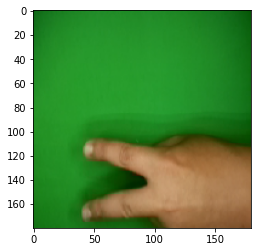

In [ ]:
import numpy as nampay
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as pyp
import matplotlib.image as matimg
import matplotlib.pyplot as pyp
import matplotlib.image as matimg
%matplotlib inline

uploaded = files.upload()

for pimg in uploaded.keys():

  # predicting images
  patoh = pimg
  gambar = image.load_img(patoh, target_size=(180,180))
  imgplot = pyp.imshow(gambar)
  x = image.img_to_array(gambar)
  x = nampay.expand_dims(x, axis=0)

  foto = nampay.vstack([x])
  classes = model.predict(foto, batch_size=10)

  print(pimg)
  kelas = nampay.argmax(classes)
  print(classes)
  print(kelas)
  if kelas==0:
    print('kertas/paper/論文')
  elif kelas==1:
    print('batu/rock/結石')
  else:
    print('gunting/scissors/はさみ')